In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Mais sobre o projeto:
https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

In [19]:
# Lendo os dados
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col=['date'])

In [20]:
# Limpando os outliers

df = df.drop(df[df['value'] > df['value'].quantile(0.975)].index)
df = df.drop(df[df['value'] < df['value'].quantile(0.025)].index)

df = df.reset_index()

# Primeira parte

In [6]:
# resetando o index e criando novas colunas de dia, mês e ano

df.reset_index(inplace=True)

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

<function matplotlib.pyplot.show(close=None, block=None)>

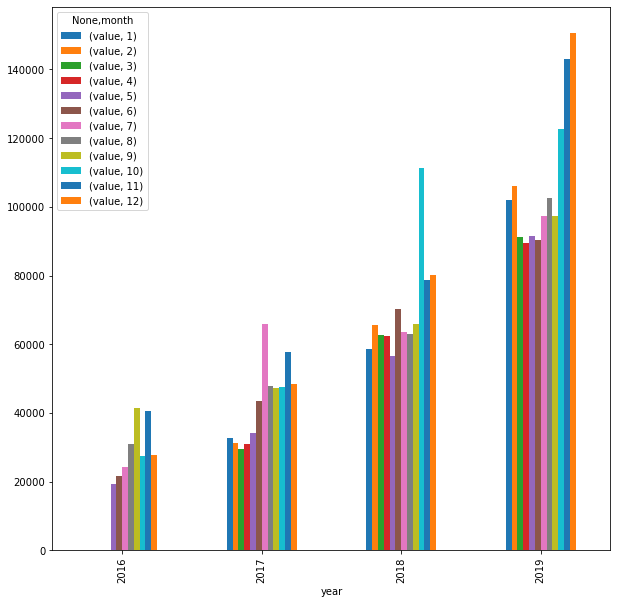

In [7]:
# plotando a média dos valores em função dos meses, agrupados por ano.
# ps: não soube como renomear os meses corretamente

fig, axs = plt.subplots(figsize=(10,10))
df_bar =   df[['month','year','value']].groupby(['year','month']).mean().unstack()
df_bar.plot(ax=axs,kind='bar')

plt.show

# Segunda parte

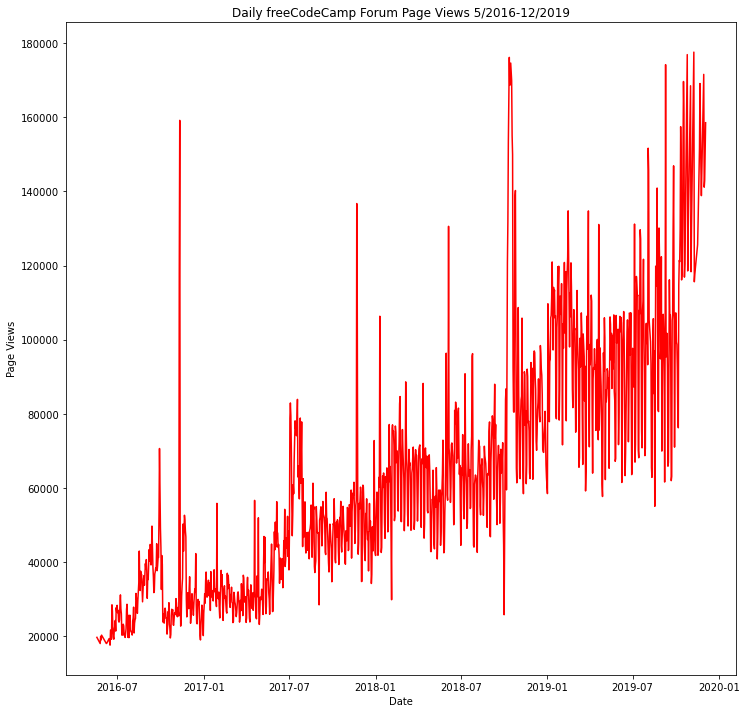

In [17]:
    # Plotando como o valor evolui ao longo do tempo
    
    fig = plt.figure(figsize=(12,12))
    plt.plot(df,color='red')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')

# Terceira parte

<AxesSubplot:xlabel='month', ylabel='value'>

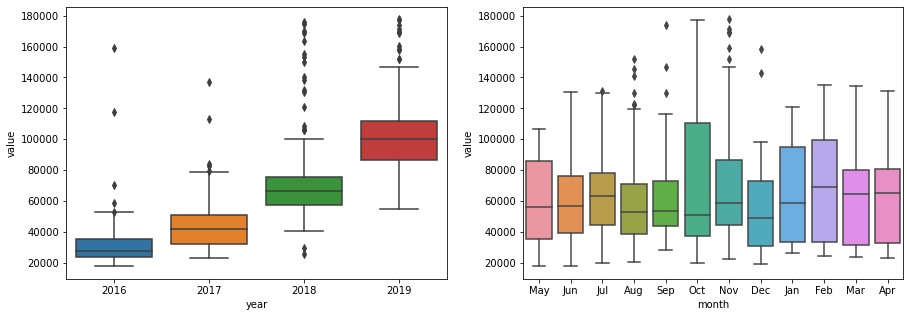

In [21]:
    # Plotando gráficos do tipo boxplot para os anos e meses agrupados por ano, respectivamente
    # ps: não soube como deixar os meses na ordem correta
    
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    fig,axs = plt.subplots(1,2,figsize=(15,5))
    
    sns.boxplot(x='year', y='value', data=df_box, ax=axs[0])
    sns.boxplot(x='month', y='value', data=df_box, ax=axs[1])